In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 8)
# we use regex here to parse the output log files
import re

Populating the interactive namespace from numpy and matplotlib


In [10]:
# we first extract results from Q1
ori_state_dict = {}
with open("part_c_out_disjoint", "rb") as out_file:
    for line in out_file.readlines():
        line_string = line.rstrip('\n')
        
        search_sth=re.match('TimeWindow{start=(.*), end=(.*)} Count: (.*) Type: (.*)', line_string)
        if search_sth:
            # t for type
            win_start_stamp, win_end_stamp, count, t = search_sth.group(1), search_sth.group(2), int(search_sth.group(3)), search_sth.group(4)
            ori_state_dict[(win_start_stamp, win_end_stamp, t)] = count

1235


In [12]:
lateness_value_list = ['30s', '60s', '100s', '500s']
lateness_file_prefix = "part_c_out_disjoint_allowlateness_"
state_dicts_list = []
for lv in lateness_value_list:
    l_state_dict = {}
    with open(lateness_file_prefix+lv, "rb") as out_file:
        for line in out_file.readlines():
            line_string = line.rstrip('\n')
            search_sth=re.match('TimeWindow{start=(.*), end=(.*)} Count: (.*) Type: (.*)', line_string)
            if search_sth:
                # t for type
                win_start_stamp, win_end_stamp, count, t = search_sth.group(1), search_sth.group(2), int(search_sth.group(3)), search_sth.group(4)
                l_state_dict[(win_start_stamp, win_end_stamp, t)] = count
    state_dicts_list.append(l_state_dict)

In [13]:
# start the counting process
count_list_ = []
for state_dict in state_dicts_list:
    counter_ = 0
    for k, v in state_dict.items():
        if k in ori_state_dict.keys():
            if v == ori_state_dict[k]:
                counter_ += 1
    count_list_.append(counter_)
print(count_list_)

[3, 31, 100, 1036]


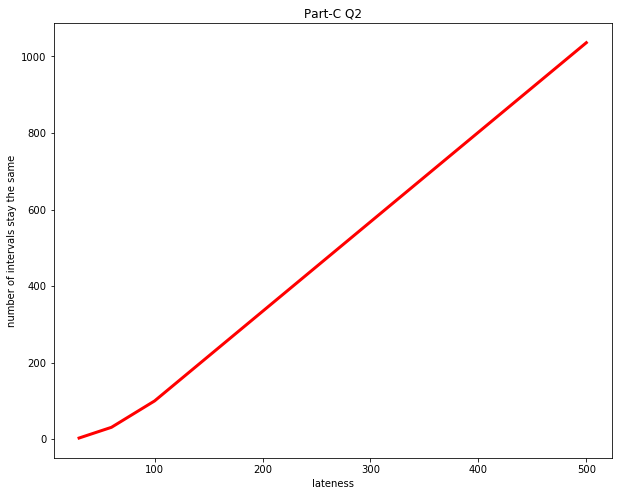

In [14]:
lateness_interval = [30, 60, 100, 500]
fig = plt.figure(1)
plt.plot(lateness_interval, count_list_, '-r', linewidth=3.0)
plt.xlabel("lateness")
plt.ylabel("number of intervals stay the same")
plt.title("Part-C Q2")
plt.show()